In [0]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import os
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [301]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/iris (1).csv")
data.sample(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
81,82,5.5,2.4,3.7,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
108,109,6.7,2.5,5.8,1.8,Iris-virginica
48,49,5.3,3.7,1.5,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
4,5,5.0,3.6,1.4,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
134,135,6.1,2.6,5.6,1.4,Iris-virginica
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
133,134,6.3,2.8,5.1,1.5,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [0]:
data.fillna(data.median(), inplace = True)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [0]:
data.replace(to_replace = "Iris-setosa", value = 0, inplace = True)
data.replace(to_replace = "Iris-versicolor", value = 1, inplace = True)
data.replace(to_replace = "Iris-virginica", value = 2, inplace = True)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [159]:
data[data.columns[1:]].corr()['Species'][:]

SepalLengthCm    0.775061
SepalWidthCm    -0.417318
PetalLengthCm    0.944477
PetalWidthCm     0.952513
Species          1.000000
Name: Species, dtype: float64

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [160]:
data.var()

Id               1938.000000
SepalLengthCm       0.676645
SepalWidthCm        0.185552
PetalLengthCm       3.076516
PetalWidthCm        0.577141
Species             0.675322
dtype: float64

There are no fields with variance < 0.1

## Question 6

*Plot the scatter matrix for all the variables.*

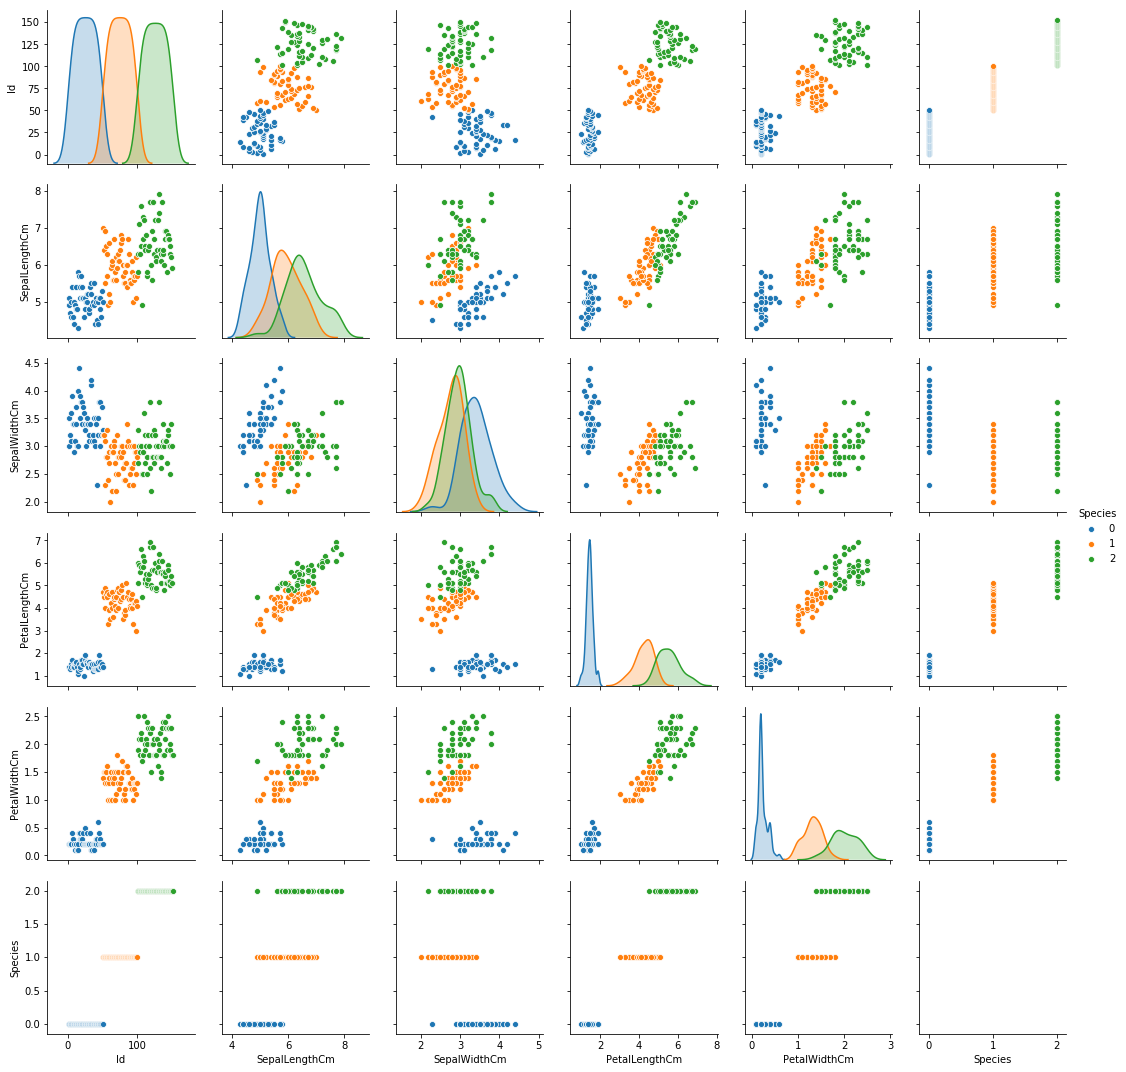

In [140]:
sns.pairplot(data, hue="Species")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [0]:
x = data.drop(['Id', 'Species'], axis = 1)

In [0]:
xTrain, xTest, yTrain, yTest = train_test_split(x, data['Species'], test_size = 0.2, random_state = 0)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [216]:
NNH3 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'euclidean')
NNH3.fit(xTrain, yTrain)
yPred = NNH3.predict(xTest)
accuracy_score(yTest, yPred)

0.967741935483871

In [170]:
NNH5 = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'euclidean')
NNH5.fit(xTrain, yTrain)
yPred = NNH5.predict(xTest)
accuracy_score(yTest, yPred)

0.967741935483871

In [171]:
NNH9 = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', metric = 'euclidean')
NNH9.fit(xTrain, yTrain)
yPred = NNH9.predict(xTest)
accuracy_score(yTest, yPred)

0.967741935483871

## Question 9 - Finding Optimal value of k.

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Miss classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [264]:
MSE_F = 1
y = []
m = []
for x in range(1, 20, 2):
  NNH = KNeighborsClassifier(n_neighbors = x, weights = 'uniform', metric = 'euclidean')
  NNH.fit(xTrain, yTrain)
  yPred = NNH.predict(xTest)
  MSE = 1 - accuracy_score(yTest, yPred)
  y.append(x)
  m.append(MSE)
  if MSE_F > MSE:
    MSE_F = MSE
    min_x = x
print 'Model with', min_x, 'neighbours has the minimum MSE', MSE_F

Model with 3 neighbours has the minimum MSE 0.032258064516129004


In [265]:
final = pd.DataFrame(y)
final['k'] = y
final['MSE'] = m
final = final.drop([0], axis =1)
final

,k,MSE
0,1,0.096774
1,3,0.032258
2,5,0.032258
3,7,0.032258
4,9,0.032258
5,11,0.032258
6,13,0.032258
7,15,0.032258
8,17,0.032258
9,19,0.032258


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

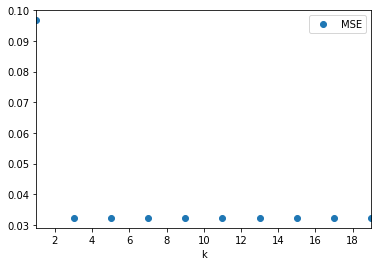

In [270]:
final.plot(x='k', y='MSE', style='o')

### Question 11: Read the data given in bc2.csv file

In [0]:
bc = pd.read_csv("/content/drive/My Drive/Colab Notebooks/bc2.csv")

### Question 12: Observe the no.of records in dataset and type of each feature 

In [294]:
bc.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [282]:
bc.count()

ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

### Question 13: Use summary statistics to check if missing values, outlier and encoding treament is necessary

In [286]:
bc.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


### Check Missing Values

In [296]:
bc.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Question 14: Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [297]:
bc.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


In [303]:
bc[Bare Nuclei].fillna(bc[Bare Nuclei].max(), inplace = True)

SyntaxError: ignored

### Question 15: Find the distribution of target variable (Class) 

#### Plot the distribution of target variable using histogram

### convert the datatype of Bare Nuclei to `int`

### Question 16: Standardization of Data

### Question 17: Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

### Question 18: Divide the dataset into feature set and target set

### Divide the Training and Test sets in 70:30 

## Question 19 - Finding Optimal value of k

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

### Question 20: Print the optimal number of neighbors